<a href="https://colab.research.google.com/github/Gomukha30/Resume_Parsing-System/blob/main/resume_parsing_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#gensim
import gensim
from gensim import corpora

#Visualization
from spacy import displacy

from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np


#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv("/content/Resume.csv")
df = df.reindex(np.random.permutation(df.index))
data = df.copy().iloc[
    0:200,
]
data.head()

,ID,Resume_str,Resume_html,Category
714,10480456,"DIRECTOR, NEW PRODUCT RESEARCH AND R&...","<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE
1242,14761906,SUBSTITUTE TEACHER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
393,58708773,SUBSTITUTE TEACHER Skills ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
1989,25187733,SAFETY PROFESSIONAL / CONSTRUCTION SU...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION
2118,13129275,INTERNAL AUDIT ASSISTANT Pr...,"<div class=""fontsize fontface vmargins hmargin...",PUBLIC-RELATIONS


In [ ]:
pip install -U spacy

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")
skill_pattern_path = "/content/jz_skill_patterns.jsonl"

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [ ]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

In [ ]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

In [ ]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
714,10480456,"DIRECTOR, NEW PRODUCT RESEARCH AND R&...","<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE,director new product research r liaison global...,"[release, electron, design, visualization, col..."
1242,14761906,SUBSTITUTE TEACHER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,substitute teacher summary enthusiastic artist...,"[design, software, support, material, medium, ..."
393,58708773,SUBSTITUTE TEACHER Skills ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,substitute teacher skill computer literate dri...,"[box, business]"
1989,25187733,SAFETY PROFESSIONAL / CONSTRUCTION SU...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,safety professional construction supervisor su...,"[accounting, database, schedule, software, com..."
2118,13129275,INTERNAL AUDIT ASSISTANT Pr...,"<div class=""fontsize fontface vmargins hmargin...",PUBLIC-RELATIONS,internal audit assistant professional summary ...,"[release, design, database, schedule, software..."


In [ ]:
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
# Job_Category = data["Category"].unique()
# Job_Category = np.append(Job_Category, "ALL")

Job_Category = input()

HR


In [ ]:
Total_skills = []
if Job_Category != "ALL":
    fltr = data[data["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
!pip install wordcloud

In [ ]:
print(len(data))

200


Text(0.5, 1.0, 'Most Used Words in HR Resume')

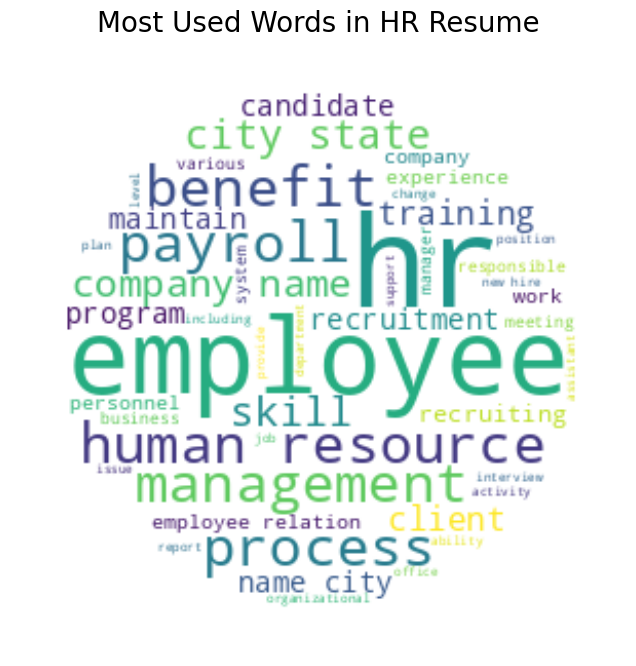

In [ ]:
text = ""
for i in data[data["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

In [ ]:
sent = nlp(data["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

In [ ]:
#displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

In [ ]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [ ]:
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

In [ ]:
input_resume = input()

Abid Ali Awan Data Scientist I am a certified data scientist professional, who loves building machine learning models and blogs about the latest AI technologies. I am currently testing AI Products at PEC-PITC, which later gets approved for human trials. abidaliawan@tutamail.com +923456855126 Islamabad, Pakistan abidaliawan.me WORK EXPERIENCE Data Scientist Pakistan Innovation and Testing Center - PEC 04/2021 - Present, Islamabad, Pakistan Redesigned data of engineers that were mostly scattered and unavailable. Designed dashboard and data analysis report to help higher management make better decisions. Accessibility of key information has created a new culture of making data-driven decisions. Contact: Ali Raza Asif - darkslayerraza10@gmail.com Data Scientist Freelancing/Kaggle 11/2020 - Present, Islamabad, Pakistan Engineered a healthcare system. Used machine learning to detect some of the common decisions. The project has paved the way for others to use new techniques to get better res

In [ ]:
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [ ]:
input_skills = input()

Data Science,Data Analysis,Database,SQL,Machine Learning,tableau


In [ ]:
req_skills = input_skills.lower().split(",")
resume_skills = unique_skills(get_skills(input_resume.lower()))
score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)
match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 66.7% matched to your requirements


In [ ]:
print(resume_skills)

['testing', 'nlp', 'exploratory data analysis', 'ai', 'speech recognition', 'visualization', 'machine learning', 'communications', 'tableau', 'simulation', 'database', 'python', 'pytorch', 'text processing', 'marketing', 'deep learning', 'engineering', 'data analysis', 'time series', 'ml']
